# Linear Regression Practice

Adapted from http://www.ritchieng.com/machine-learning-linear-regression/

Before start,  
I checked the Kaggle of [Stacked Regressions : Top 4% on LeaderBoard
](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard) by **Serigno** To analyse the Correlation graphic.  

## 1. Reading Data using Panda

### 1.1 Import Libraries

In [1]:
#import some necessary librairies
# linear algebra
import numpy as np
#data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
# Matlab-style plotting
%matplotlib inline
import matplotlib.pyplot as plt
#Statical data visualization
import seaborn as sns
# scientific libraries
from scipy import stats
from scipy.stats import norm, skew #for some statistics
# data processing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

### 1.2 Read Files

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
# dimensions of data frame
train.shape

(1460, 81)

In [6]:
test.shape

(1459, 80)

## 2. Data Pre Processing

### 2.1 Variable to predict

We have the variable **GrLivArea**: Above grade (ground) living area square feet. (it was provided by `description.txt` file)

In [7]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

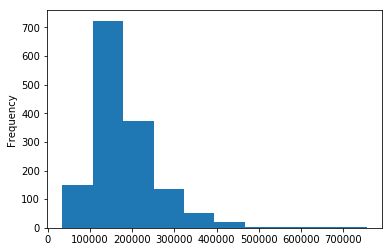

In [8]:
train['SalePrice'].plot(kind = "hist")

### 2.2 Correlation with SalePrice

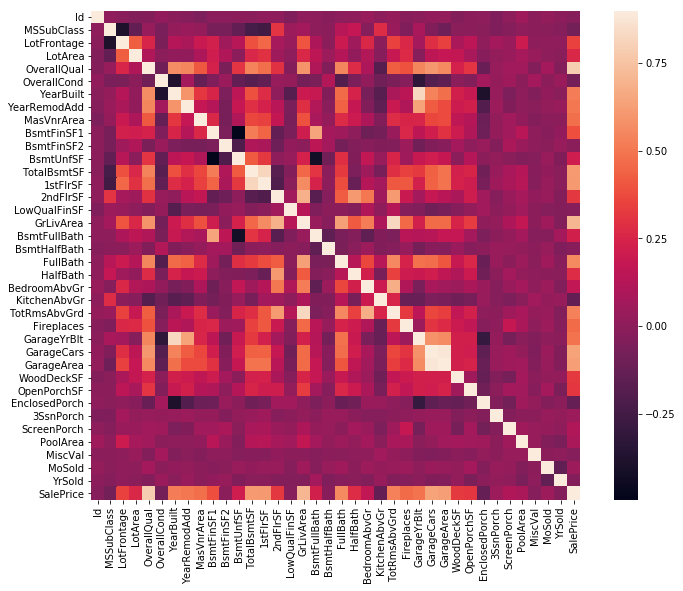

In [9]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

We need to merge all data and solve the missing data (train and test).

In [10]:
#Getting correlation matrix and Ordering parameters acording correlation
corrmat = (train.corr().abs())['SalePrice'].sort_values(ascending=False)
corrmat

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
Id               0.021917
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePr

### 2.3 Missing Data

In [11]:
#missing data for train data
total_train = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_train, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [12]:
#missing data for test data
total_test = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_test, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageQual,78,0.053461
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461


### 2.4 Merging Train and Test Data 

In [13]:
# Extracting targets
Y=train['SalePrice']

In [14]:
Y.shape

(1460,)

In [15]:
# Separating input parameters
train=train.drop(columns=['SalePrice'])

In [16]:
# Merging train and test datasets for pre-processing
frames = [train, test]
all_data = pd.concat(frames)

In [17]:
all_data.shape

(2919, 80)

In [18]:
all_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [19]:
#Analysing missing data in parameters
total_data = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_data, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495
GarageCond,159,0.054471
GarageQual,159,0.054471
GarageYrBlt,159,0.054471
GarageFinish,159,0.054471


## 3. Preparing Data

### 3.1 Deleting Trash Parameters

As you see the table above, there is a huge quantity of NaN objects, so to predict values, we can delete those parameters.

In [20]:
# Dropping parameters by Nan content
all_data=all_data.drop(columns=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'])

#Dropping parameters by low correlation
all_data=all_data.drop(columns=corrmat[corrmat<0.35].index)

In [21]:
all_data.shape

(2919, 53)

In [22]:
all_data.head()

,MSZoning,LotFrontage,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,65.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,WD,Normal
1,RL,80.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,WD,Normal
2,RL,68.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,WD,Normal
3,RL,60.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,WD,Abnorml
4,RL,84.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,WD,Normal


### 3.2 Replacing Missing Data

In [23]:
# Searching at each parameter for Nan data 
for var in all_data:
        if all_data[var].dtype!='O':
            # For int and floats we use the mean
            all_data[var].fillna((all_data[var].mean()), inplace=True)
        else:
            # For string data we use the mode
            all_data[var].fillna((all_data[var].mode()[0]), inplace=True)
all_data_m=all_data

In [24]:
all_data_m.head()

,MSZoning,LotFrontage,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,65.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,WD,Normal
1,RL,80.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,WD,Normal
2,RL,68.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,WD,Normal
3,RL,60.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,WD,Abnorml
4,RL,84.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,WD,Normal


In [25]:
# Verifying missing data
#Analysing missing data in parameters
total_data = all_data_m.isnull().sum().sort_values(ascending=False)
percent = (all_data_m.isnull().sum()/all_data_m.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_data, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
SaleCondition,0,0.0
BsmtQual,0,0.0
ExterCond,0,0.0
ExterQual,0,0.0
MasVnrArea,0,0.0


### 3.3 Encoding Categorical Data

In [26]:
# Creating a list with all the categorical variables in the dataset
categorical_var=[]
for var in all_data_m:
    if all_data_m[var].dtype=='O':
        categorical_var.append(var)
# Using the function get_dummies we use the list "categorical_var" and encode the categorical variables. 
all_data_m = pd.get_dummies(all_data_m, columns = categorical_var)

In [27]:
all_data_m.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,7,2003,2003,196.0,706.0,856.0,856,1710,2,...,0,0,0,1,0,0,0,0,1,0
1,80.0,6,1976,1976,0.0,978.0,1262.0,1262,1262,2,...,0,0,0,1,0,0,0,0,1,0
2,68.0,7,2001,2002,162.0,486.0,920.0,920,1786,2,...,0,0,0,1,0,0,0,0,1,0
3,60.0,7,1915,1970,0.0,216.0,756.0,961,1717,1,...,0,0,0,1,1,0,0,0,0,0
4,84.0,8,2000,2000,350.0,655.0,1145.0,1145,2198,2,...,0,0,0,1,0,0,0,0,1,0


### 3.4 Data Standarization

In [28]:
for var in all_data_m:
    #all_data_m[var]=(all_data_m[var]-all_data_m[var].mean())/(all_data_m[var].std())
    all_data_m[var]=(all_data_m[var]-all_data_m[var].min())/(all_data_m[var].max()-all_data_m[var].min())

In [29]:
all_data_m.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.150685,0.666667,0.949275,0.883333,0.12250,0.125089,0.140098,0.109641,0.259231,0.50,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.202055,0.555556,0.753623,0.433333,0.00000,0.173281,0.206547,0.194917,0.174830,0.50,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.160959,0.666667,0.934783,0.866667,0.10125,0.086109,0.150573,0.123083,0.273549,0.50,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.133562,0.666667,0.311594,0.333333,0.00000,0.038271,0.123732,0.131695,0.260550,0.25,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.215753,0.777778,0.927536,0.833333,0.21875,0.116052,0.187398,0.170342,0.351168,0.50,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## 4. Spliting Data

### 4.1 Separating into Train data and Test data

In [30]:
# Getting train data
data_train = all_data_m.iloc[:train.shape[0],:]
# Getting test data
data_test = all_data_m.iloc[train.shape[0]:,:]

### 4.2 Preparing Input - Output data

In [31]:
X=data_train.iloc[:,:].values;
X=np.column_stack((np.ones((X.shape[0],1)),X))


In [32]:
X.shape

(1460, 250)

In [33]:
Y=Y.iloc[:].values;
Y=np.reshape(Y, (Y.shape[0], 1))

In [34]:
Y.shape

(1460, 1)

### 4.3 Separating into Training data and Validation data

In [35]:
# Generating a random array to get random elements in the training-validation data
ordering= np.arange(X.shape[0])
np.random.shuffle(ordering)

In [36]:
# 80% training-20% validation
num_train=ordering[0:int(X.shape[0]*0.8)]
num_test=ordering[int(X.shape[0]*0.8):X.shape[0]]

In [37]:
X_train=X[num_train,:]
X_train.shape

(1168, 250)

In [38]:
X_test=X[num_test,:]
X_test.shape

(292, 250)

In [39]:
Y_train=Y[num_train]
Y_train.shape

(1168, 1)

In [40]:
Y_test=Y[num_test]
Y_test.shape

(292, 1)

### 4.4 Training The Supervised Learning

In [41]:
alfa=0.0001
epochs=800000
# Initializing weights
theta=np.random.rand(1,X_train.shape[1])/X_train.shape[1]
for epoch in range(epochs):
    # Calculation of weights updating
    # y_hx = y - h(x) = y - theta*X_train^T
    y_hx = np.transpose(Y_train) - np.matmul(theta, np.transpose(X_train))
    dtheta = alfa*np.matmul(y_hx, X_train)/X.shape[0]
    theta += dtheta
print(theta)
print(y_hx)

[[ 5.14989833e+03  4.58932463e+03  5.07695680e+04  1.28555304e+03
   1.18489776e+04  2.18560878e+04  1.19116065e+04  2.02525192e+04
   3.02852659e+04  5.12826532e+04  3.28727221e+04  4.60412675e+04
   3.65924979e+04 -6.71237052e+02  3.42661234e+04  2.77286194e+04
  -1.04241811e+04  5.66896999e+03  1.92635030e+03  7.46914911e+03
   5.09615572e+02 -2.68050505e+03  7.83040407e+03 -2.63315647e+03
   1.57843321e+04 -6.13803796e+03 -1.86323472e+03 -9.59650614e+03
   9.12497868e+03  5.01687997e+02  5.11973941e+03  6.52460898e+03
  -1.37470431e+03  2.69202838e+03  1.26446364e+04 -9.79747574e+03
  -3.77427804e+02 -1.18555366e+01 -1.72575841e+03  5.17089490e+03
   1.70476653e+03 -3.99980993e+03  2.59093659e+01  1.16429597e+03
   2.82090089e+02 -3.44149957e+03 -1.05110606e+04  1.63245942e+04
  -1.99662616e+04 -1.53881811e+04 -8.66279923e+03 -5.10690385e+03
  -1.31347651e+04 -1.01979766e+04  1.25455760e+03 -5.41895382e+03
   4.90934030e+04  1.87466096e+04 -7.07761761e+03 -1.63796238e+02
  -6.72569

### 4.5 Verifying with Test Data

In [42]:
Y_pred=np.matmul(X_test,np.transpose(theta))

In [43]:
y_test = Y_test
y_pred = Y_pred

In [44]:
y_test

array([[121600],
       [248000],
       [197000],
       [196500],
       [220000],
       [132500],
       [284000],
       [161000],
       [136900],
       [136000],
       [ 97000],
       [116900],
       [222000],
       [172400],
       [115000],
       [190000],
       [169990],
       [168500],
       [165000],
       [ 90000],
       [223000],
       [158000],
       [200000],
       [100000],
       [ 87000],
       [225000],
       [152000],
       [172500],
       [132500],
       [260000],
       [ 39300],
       [333168],
       [117000],
       [176000],
       [189000],
       [125000],
       [146800],
       [109900],
       [136500],
       [113000],
       [106500],
       [ 99900],
       [175000],
       [ 93500],
       [118000],
       [207500],
       [179900],
       [160200],
       [144000],
       [119900],
       [264561],
       [172000],
       [ 84500],
       [306000],
       [ 85000],
       [196000],
       [135000],
       [106250],
       [336000

In [45]:
y_pred

array([[109962.28044631],
       [278902.14498386],
       [182410.40305593],
       [190572.49391819],
       [258675.36788301],
       [155761.07176496],
       [268948.30059204],
       [187303.20308515],
       [140026.67824445],
       [164526.02148063],
       [ 84292.40469749],
       [118964.77929418],
       [318119.18857912],
       [169888.09529597],
       [104355.22177605],
       [197644.2404866 ],
       [194812.59357655],
       [153333.4989686 ],
       [161858.44379266],
       [107411.92734407],
       [231371.41603811],
       [158090.35930409],
       [212298.17154938],
       [ 95618.38528298],
       [ 70969.46659254],
       [222391.40144226],
       [177669.11368864],
       [199548.16437449],
       [130003.56053876],
       [221580.64529367],
       [ 49786.96688265],
       [314603.67593244],
       [130921.04243337],
       [186615.88658253],
       [199555.69325862],
       [ 99385.76454464],
       [154520.78911743],
       [117284.49304774],
       [1646

## 5. Evaluate Errors and Test Data

### 5.1 RMSLE

In [46]:
np.sqrt(np.mean((np.log(1+y_pred) - np.log(1+y_test))**2))

0.15643672044937604

**Mean Absolute Error (MAE)** is the mean of the absolute value of the errors:
    $$\frac{1}{m}\sum_{i=1}^{m}|y^{(i)}-y'^{(i)}|$$

**Mean Squared Error (MSE)** is the mean of the squared errors:
    $$\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}-y'^{(i)})^2$$
    

**Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:
     $$\sqrt{\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}-y'^{(i)})^2}$$
    

Comparing these metrics:
- MAE is the easiest to understand, because it's the average error.
- MSE is more popular than MAE, because MSE "punishes" larger errors.
- RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units. Easier to put in context as it's the same units as our response variable

### 5.2 Testing Data

In [47]:
data_test.shape

(1459, 249)

In [48]:
X=data_test.iloc[:,:].values;
X=np.column_stack((np.ones((X.shape[0],1)),X))

In [49]:
X.shape

(1459, 250)

In [50]:
Y=np.matmul(X,np.transpose(theta)) # y = theta^T . X

In [51]:
Y.shape

(1459, 1)

In [52]:
data_predicted = pd.DataFrame(Y, columns = ["SalePrice"])
data_predicted.index = np.arange(1461, 1461+len(data_predicted))
data_predicted.to_csv("data/predictions.csv")
data_predicted

,SalePrice
1461,106167.659195
1462,144412.418133
1463,176910.058636
1464,189007.895793
1465,193425.897811
1466,166616.189298
1467,159713.910501
1468,165748.274569
1469,199673.493180
1470,125794.410361
